# FLiSOL La Rioja 2020
Emiliano Lopez (@yosobreip) - 30/05/2020

In [50]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [105]:
datos = pd.read_csv("data/datos-sfe.csv", sep=",")
datos.head()

fecha     localidad departamento   provincia    latitud   longitud
0  2020-03-13     Gualeguay          NaN  Entre Ríos -33.144619 -59.332405
1  2020-03-17        Paraná          NaN  Entre Ríos -31.747241 -60.550068
2  2020-03-18     Gualeguay          NaN  Entre Ríos -33.144619 -59.332405
3  2020-03-20  Gualeguaychú          NaN  Entre Ríos -33.008098 -58.583538
4  2020-03-25        Paraná          NaN  Entre Ríos -31.747241 -60.550068

## Visualización de datos sobre mapas

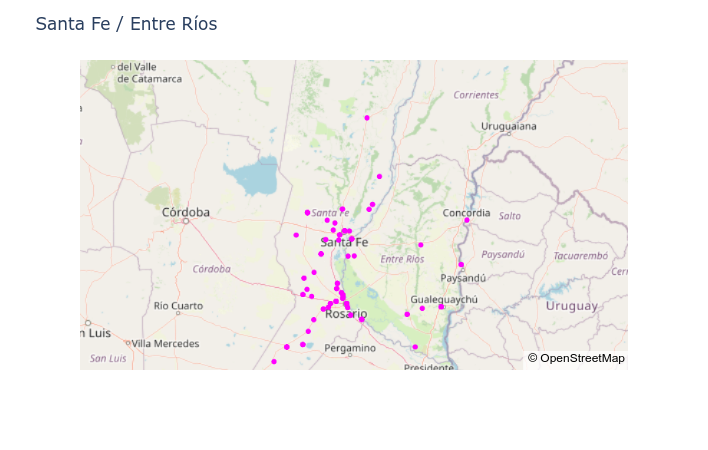

In [106]:
fig = px.scatter_mapbox(datos, lat="latitud", lon="longitud",color_discrete_sequence=["fuchsia"],
                        zoom=5.0, hover_name="localidad",
                        center={"lat":-31.3,"lon":-60.5},
                       )
fig.update_layout(title=f"Santa Fe / Entre Ríos",
                  mapbox_style="open-street-map",)
fig.show()
fig.write_html("web/sfe_map.html", include_plotlyjs="cdn", full_html=False)

## Gráficos

In [95]:
# agrupo por localidad
grupo_loca = datos.groupby("localidad")
# diccionario con datos que necesito para graficar
df_sfe_to_map = {"localidad":[], "departamento":[], "provincia":[], "latitud":[], "longitud":[], "casos":[]}
for localidad, df_localidad in grupo_loca:
    ind = datos["localidad"] == localidad
    datos["casos"] = ""
    datos.loc[ind,"casos"] = df_localidad.fecha.count()
    d = datos[ind].iloc[0]
    df_sfe_to_map["localidad"].append(d["localidad"])
    df_sfe_to_map["departamento"].append(d["departamento"])
    df_sfe_to_map["provincia"].append(d["provincia"])
    df_sfe_to_map["latitud"].append(d["latitud"])
    df_sfe_to_map["longitud"].append(d["longitud"])
    df_sfe_to_map["casos"].append(d["casos"])

In [98]:
# armo dataframe a partir de diccionario
df = pd.DataFrame(df_sfe_to_map)
ind = df["provincia"] == "Santa Fe"
df[ind].head()

localidad departamento provincia    latitud   longitud  casos
0         Armstrong     Belgrano  Santa Fe -32.781470 -61.623332      2
1       Arroyo Seco      Rosario  Santa Fe -33.160058 -60.572865      2
2  Capitán Bermúdez  San Lorenzo  Santa Fe -32.825319 -60.736742      1
3           Casilda      Caseros  Santa Fe -33.048511 -61.174510      2
4           Cayastá        Garay  Santa Fe -31.194302 -60.168875      1

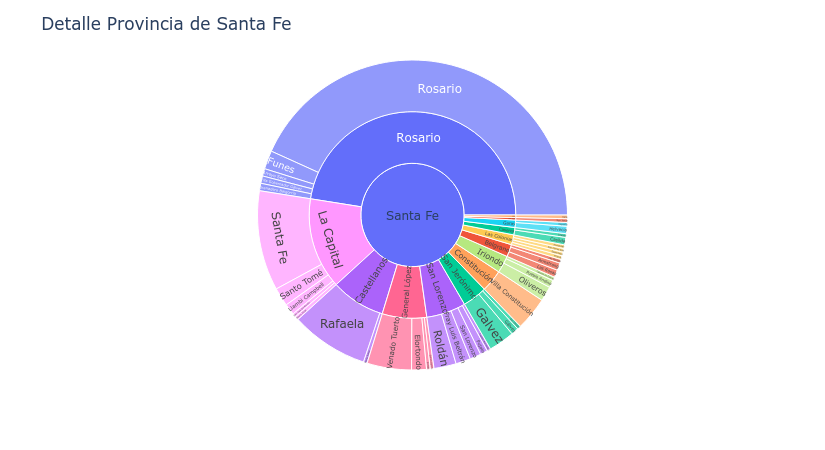

In [100]:
fig = px.sunburst(df[ind], path=['provincia','departamento', 'localidad'], values='casos', color='departamento', color_continuous_scale='deep')
fig.update_traces(go.Sunburst(hovertemplate='<b>%{label} </b> <br> %{value} casos'))
fig.update_layout(title=f"Detalle Provincia de Santa Fe")
fig.show(config={'displayModeBar': True})
fig.write_html("web/sfe_sol.html", include_plotlyjs="", full_html=False)